# Anomaly Detection

- It involves identifying data points, events, or observations that deviate significantly from the norm (majority)
- Also called outliers or atypical points
- They indicate critical accidents errors, fraud, etc... depending on the context of the business scenario
- The methods we explored before focused on removing the outliers (outlier treatment). On the other hand, we want to spot them in Anomaly Detection. Plus, the main difference is they are statistically based and focus only on one feature.
- Types:
    - Supervised: Giving the model labels define what an anomaly looks like. e.g. fraud or no fraud. It's basically a classification model (Logsitic Regression, SVM, DecisionTree Classifier, etc...)
    - Unsupervised: It does not require a label. They're used when they are rare and we don't have much data(examples) that define them. There are two main categories:
        - Clustering Algorithms: e.g. K-Means and DBSCAN
        - Isolation-Based Algorithms: e.g. Isolation Forest

## Using Clustering Algorithms (KNN)

- KNN: K-Nearest Neighbor
- It can be used for both Classification and Anomaly detection
- Concept:
    - It measures "nearness" of the data points (e.g. Euclidean distance and Manhattan distance)
    - k value (hyperperameter) is chosen to represent the number of nearest neighbors to be considered
    - It is very crucial to choose the proper k-value for performance  eof the algorithm

![knn](https://miro.medium.com/v2/resize:fit:810/0*FakkqTKdMPDb3gof.jpg)

Steps for Outlier Detection:
1. Deploy the KNN model (choose the k value)
2. Calculate the distances between data points and indices of the nearest neighbors from the model output
3. Calculate the mean of the k-distances of each observation
4. Plot the data 
5. Determine the cutoff based on the desired outlier value

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotx


from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors

In [102]:
#plt.style.use('ggplot')
plt.style.use(matplotx.styles.dracula)

In [103]:
iris_data = load_iris()

print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [104]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

- get the first 2 features for this analysis
- this means the anomaly will be spotted based on the 2 features

In [105]:

df = pd.DataFrame(iris_data.data[:,:2], columns=['sepal length (cm)',
 'sepal width (cm)'])

df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Text(0, 0.5, 'sepal width (cm)')

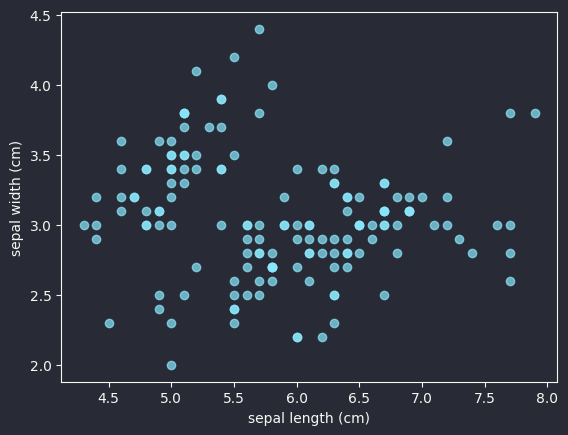

In [106]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], alpha=.7) #original 
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Step 1

In [107]:
#define the model
knn_model = NearestNeighbors(n_neighbors=3)

#fit the model
knn_model.fit(df)

NearestNeighbors(n_neighbors=3)

Step 2

calcualte 2 values using `kneighbors()`
- neigh_dist
    - ndarray of shape (n_queries, n_neighbors)
    - Array representing the lengths to points, only present if return_distance=True.

- neigh_ind
    - ndarray of shape (n_queries, n_neighbors)
    - Indices of the nearest points in the population matrix.

In [108]:
distances, indices = knn_model.kneighbors(df)

Step 3

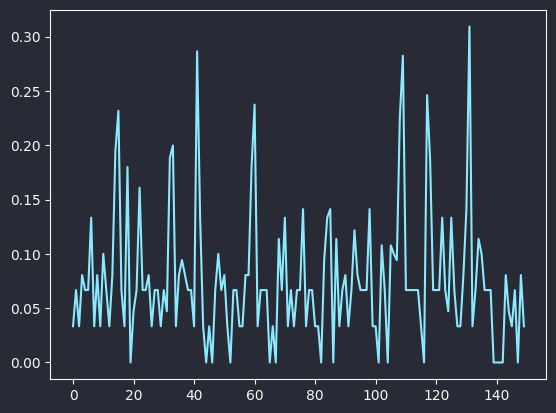

In [109]:
plt.plot(distances.mean(axis=1))

- The plot above shows the data points the have the highest average distance from every other data points (neighboring points)
- We can see the peaks that represent the highest distance -> outlier/anomaly
- It seems 0.15 is a good threshold to spot the anomalies
- We can ge the index values of said anomalies using the threshold to spot them in the data

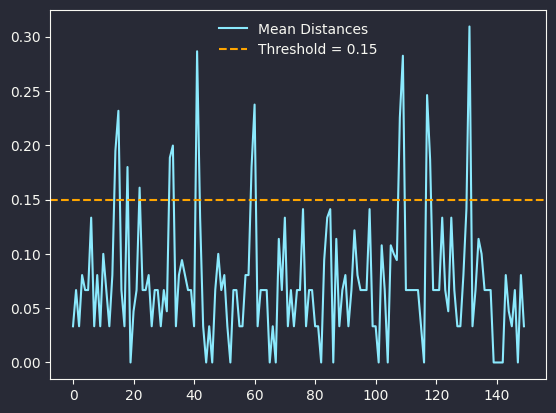

In [110]:
plt.plot(distances.mean(axis=1), label='Mean Distances')
plt.axhline(y=0.15, color='orange', label='Threshold = 0.15', linestyle='--')
plt.legend()

In [111]:
threshold = 0.15

anomaly_index = np.where(distances.mean(axis=1) > threshold)
anomaly_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [112]:
#build an anomaly dataframe
anomaly_df = df.iloc[anomaly_index]
anomaly_df

,sepal length (cm),sepal width (cm)
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


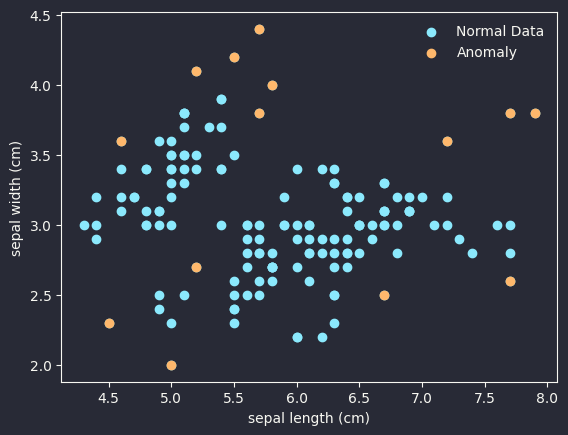

In [100]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], label='Normal Data') #original 
plt.scatter(anomaly_df['sepal length (cm)'], anomaly_df['sepal width (cm)'], label='Anomaly') #anomaly

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

> NOTE: some data points may seem a non-outlier because they are not on the extreme values spectrum, but may be an anomaly because they are far from their nearest group (depending on the business application)

## Using PyOD

- `pip install pyod`
- PyOD: Python Outlier Detection
- It's a rich library with 25 algorithms dedicated for outlier/anomaly detection
- We'll be using 2 popular algorithms:
    - ABOD:
        - Angle-Based Outlier Detection
        - It calculates the angles formed between a point and every pair of other points in the dataset
        - Then, it calculates the variance of the angles
        - The points with low angle variance are considered outliers
    - IForest:
        - Isolation Forest
        - It constructs multiple decision trees so it can isolate the data points that are anomalies
- According to PyOD documentation, it's recommended to normalize/standardize the data before deploying the model

#### Data Prep

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [64]:
# get all columns
X = iris_data.data

#Standardize the data
SS = StandardScaler()
X_scaled = SS.fit_transform(X)

In [65]:
# for visualization purposes
pca_model = PCA(n_components=2)

X_pca = pca_model.fit_transform(X_scaled)

### IForest

In [66]:
from pyod.models.iforest import IForest

#deploy the model
#use contamination hyperparameter to control the intensity of identifying outliers
iforest_model = IForest(contamination=0.15, random_state=10)

In [67]:
#fit the model
iforest_model.fit(X_scaled)

#outlier prediction
outliers = iforest_model.predict(X_scaled)

In [68]:
# do the above in one shot iforest_model.fit_predict()

In [69]:
# Create a DataFrame with PCA data and outlier labels
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],         # First principal component
    'PC2': X_pca[:, 1],         # Second principal component
    'Outlier': outliers         # Outlier labels
})

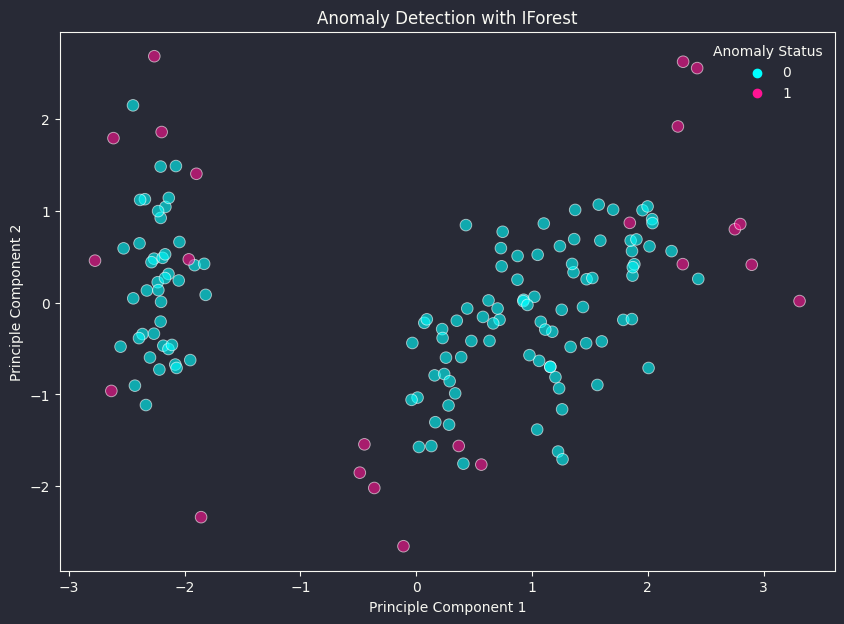

In [70]:
# plotting the outliers

plt.figure(figsize=(10,7))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Outlier',            # Automatically colors based on Outlier labels
    palette={0: 'cyan', 1: 'deeppink'},  # Custom colors
    s=70,                       # Adjust marker size if needed
    alpha=0.6
)

plt.xlabel('Principle Component 1') 
plt.ylabel('Principle Component 2')
plt.title('Anomaly Detection with IForest')

plt.legend(title="Anomaly Status", loc='best')
plt.show()

Text(0, 0.5, 'sepal width (cm)')

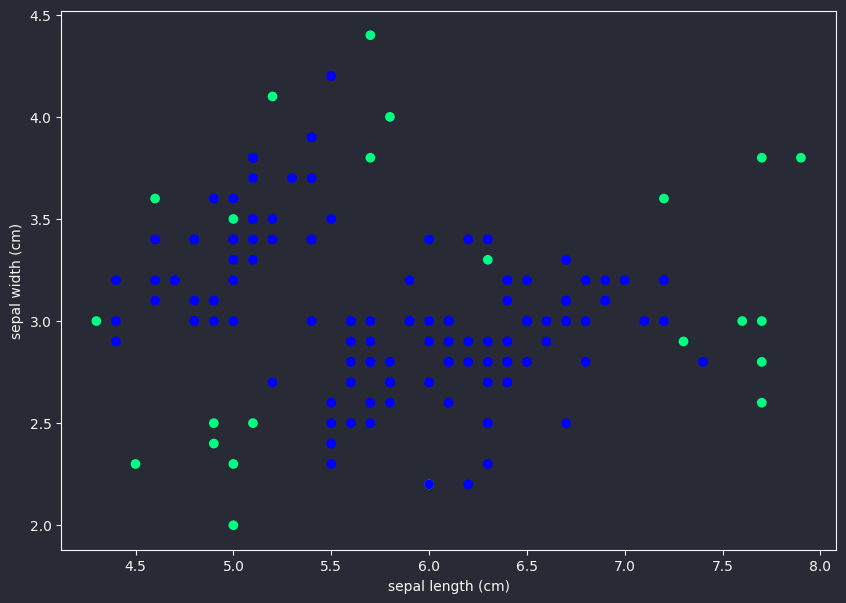

In [71]:
plt.figure(figsize=(10,7))

plt.scatter(x=X[:,0], #the first PC
            y=X[:,1], #the second PC
            c=outliers, # predicted outlier from iForest
            cmap='winter'
            )

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

In [72]:
df = pd.DataFrame(X, columns=iris_data.feature_names)
df['outlier_iforest'] = outliers
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),outlier_iforest
63,6.1,2.9,4.7,1.4,0
149,5.9,3.0,5.1,1.8,0
23,5.1,3.3,1.7,0.5,0
56,6.3,3.3,4.7,1.6,0
41,4.5,2.3,1.3,0.3,1
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
131,7.9,3.8,6.4,2.0,1
124,6.7,3.3,5.7,2.1,0
122,7.7,2.8,6.7,2.0,1


In [73]:
import plotly.express as px
fig = px.scatter_3d(df, x='sepal width (cm)', y='sepal length (cm)', z='petal width (cm)',
              color='outlier_iforest')
fig.show()

### ABOD

ABOD is based on the idea that outliers often have different distributions of angles between them and other data points compared to inliers.

In [74]:
from pyod.models.abod import ABOD

model = ABOD(contamination=0.12) #use hyperparameter tuning here

In [75]:
model.fit(X_scaled)

#outlier prediction
outliers = model.predict(X_scaled)

In [76]:
# Create a DataFrame with PCA data and outlier labels
df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],         # First principal component
    'PC2': X_pca[:, 1],         # Second principal component
    'Outlier': outliers         # Outlier labels
})

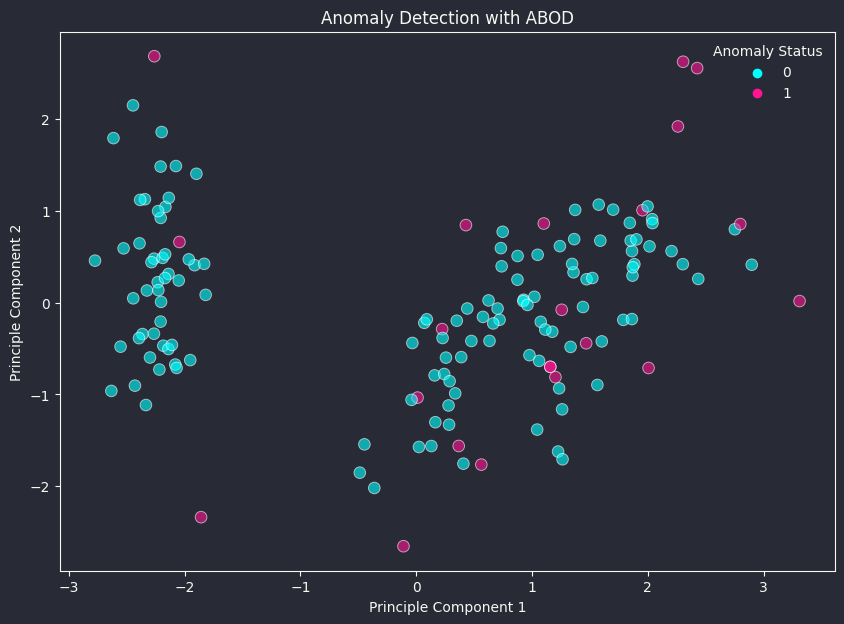

In [77]:
# plotting the outliers

plt.figure(figsize=(10,7))

sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='Outlier',            # Automatically colors based on Outlier labels
    palette={0: 'cyan', 1: 'deeppink'},  # Custom colors
    s=70,                       # Adjust marker size if needed
    alpha=0.6
)

plt.xlabel('Principle Component 1') 
plt.ylabel('Principle Component 2')
plt.title('Anomaly Detection with ABOD')
plt.legend(title="Anomaly Status", loc='best')
plt.show()

In [78]:
df['outlier_abod'] = outliers
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),outlier_iforest,outlier_abod
84,5.4,3.0,4.5,1.5,0,1
146,6.3,2.5,5.0,1.9,0,0
23,5.1,3.3,1.7,0.5,0,0
42,4.4,3.2,1.3,0.2,0,0
101,5.8,2.7,5.1,1.9,0,1
36,5.5,3.5,1.3,0.2,0,1
24,4.8,3.4,1.9,0.2,0,0
52,6.9,3.1,4.9,1.5,0,0
13,4.3,3.0,1.1,0.1,1,0
140,6.7,3.1,5.6,2.4,0,0
